# Online Payment Fraud Detection

## About the Dataset

This Kaggle Dataset **"Online Payment Fraud Detection"** involves training a machine learnung classifier to distinguish between fraudulent and legitimate transactions. 
The dataset includes the following features: 

- **step**: Time step, where each step represents one hour

- **type**: Type of the online transaction

- **amount**: Transaction amount

- **nameOrig**: Originating customer

- **oldbalanceOrg**: Customer’s balance before the transaction

- **newbalanceOrig**: Customer’s balance after the transaction

- **nameDest**: Recipient of the transaction

- **oldbalanceDest**: Recipient’s balance before the transaction

- **newbalanceDest**: Recipient’s balance after the transaction

- **isFraud**: Indicator of fraudulent transactions

This overview explains how the dataset is structured to help identify the patterns that lead to online payment fraud.

## Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
from dotenv import load_dotenv

## Data Analysis

In [2]:
load_dotenv()
base_path = os.getenv("DATA_PATH")

In [3]:
df = pd.read_csv(os.path.join(base_path, "onlinefraud.csv"))

In [4]:
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### Checking for missing or duplicated Values

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

So far no missing values! 

In [7]:
df.duplicated().sum()

np.int64(0)

No duplicates either in the dataset!

In [8]:
# Make a copy so, if necessary, we can go back to the original dataset

df_copy = df.copy()

In [9]:
df_copy = df_copy.rename(columns={'oldbalanceOrg': 'oldbalanceOrig'})

In [10]:
fraud_counts = df_copy['isFraud'].value_counts()
print(fraud_counts)

isFraud
0    6354407
1       8213
Name: count, dtype: int64


We can see a strong imbalance here. We have significantly more non-fraud cases than fraud, which if not properly addressed, can lead to a model that is biased due to this strong imbalance. 

In [11]:
df_copy[['step', 'amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].describe()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08


**Conclusion**:

**Transaction Amount**:
- the mean transaction is around 179.000, but the median is only 75.000
- this can indicate a right skewed distribution - and a few high transactions pull the average up
- tha max value exceeds 92 million, which is a little suspicious and highlighting the presence of significant outliers

**Sender Account Balances (oldbalanceOrig and newbalanceOrig)**:
- many transactions have an old balance of 0, and the median for newbalanceOrig is also 0, suggesting that many transactions originate from accounts with little to no funds. Or there is a mistake in the data.
- but there are also cases with very high balances, as reflected in the high standard deviation and maximum values.

**Recipient Account Balances (oldbalanceDest and newbalanceDest)**:
- although the 25th percentile is 0, the medians are considerably higher (approximately 132,000 for oldbalanceDest and 215,000 for newbalanceDest).
- this might indicate that while many recipient accounts start with 0 or low balances, they often receive high amounts

**Overall Conclusion**:
- high standard deviations and the differences between mean and median values suggest a highly skewed distribution with outliers
- the outliers should be taken into account during modeling, possibly by applying transformations to achieve more robust results.

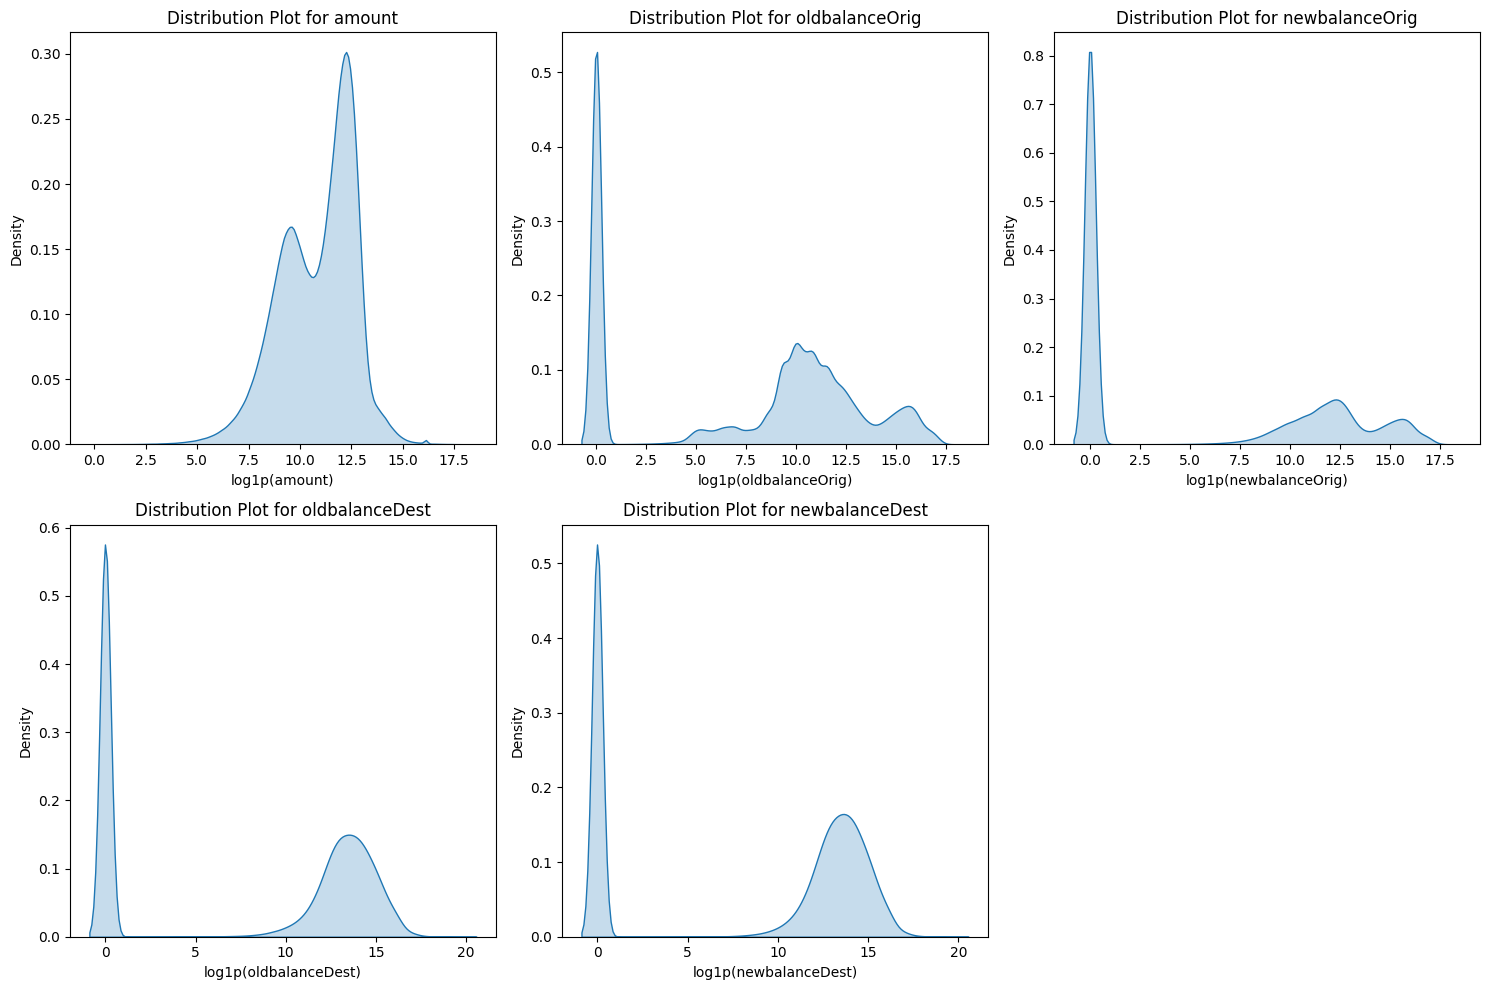

In [12]:
# Distribution Plots

columns = ['amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

plt.figure(figsize=(15, 10))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(np.log1p(df_copy[col]), fill=True)
    plt.title(f"Distribution Plot for {col}")
    plt.xlabel(f'log1p({col})')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

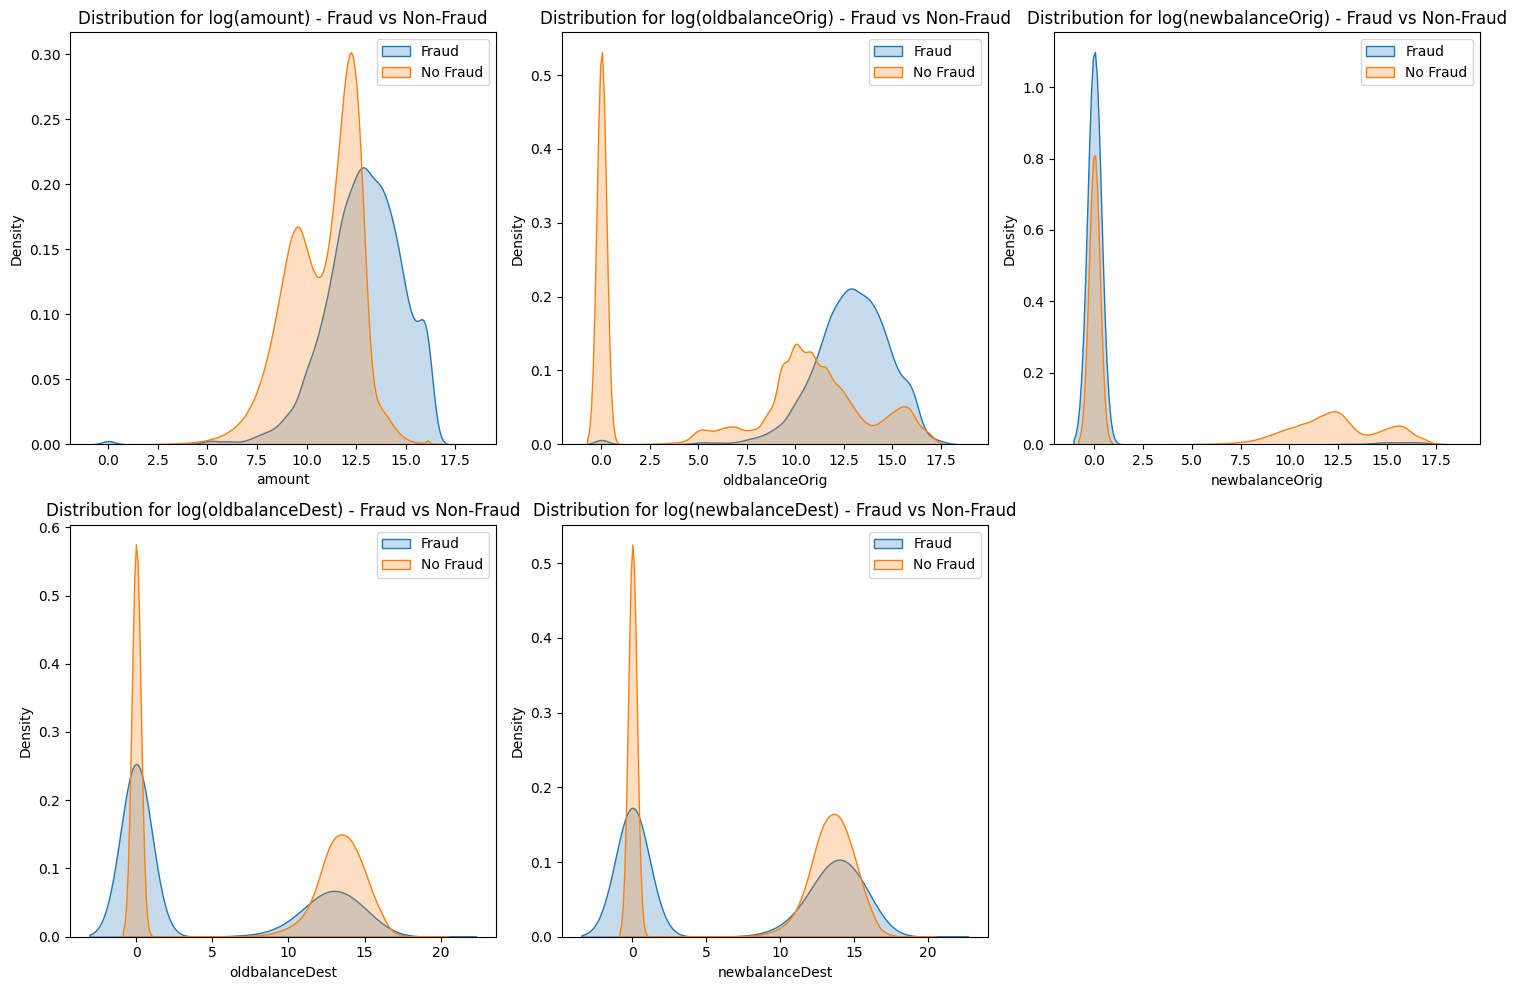

In [13]:
# Distribution with Fraud vs Non-Fraud

fraud = df_copy[df_copy['isFraud'] == 1]
non_fraud = df_copy[df_copy['isFraud'] == 0]

plt.figure(figsize=(15,10))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(np.log1p(fraud[col]), label = 'Fraud', fill = True)
    sns.kdeplot(np.log1p(non_fraud[col]), label = 'No Fraud', fill = True)
    plt.title(f'Distribution for log({col}) - Fraud vs Non-Fraud')
    plt.legend()
plt.tight_layout()
plt.show()

**Conclusion**

**log(amount)**:
- the fraud curve is shifted more to the right compared to the No Fraud curve, suggesting that fraudulent transactions tend to have higher amounts.
- the No Fraud distribution is more spread out, while Fraud shows a clearer concentration at a higher range.

**log(oldbalanceOrig)**:
- the Fraud distribution appears to be more concentrated i the mid-to-hgh range, could be indicating that fraudulent transactions often originate from accounts with higher initial balances.

**log(newbalanceOrig)**:
- the curves could imply that after a fraudulent transaction the new balance of origin account is often very low or even zero ( in case the entire amount is taken).

**log(oldbalanceDest)**:
- the recipient's balance is more frequently low or even zero before the transaction in fraudulent transactions.
- could indicate that there is a use of new or inactive accounts to receive funds.

**log(newbalanceDest)**:
- for Fraud the recipient's balance tends to jump from near zero to a higher value, as  reflected by the shift in the fraud distribution.

**Overall Conclusion**:
- Fraudulent transactions often involve higher amounts ans show distinct patterns in account balances before and after transactions.
- the distributions indicate that these features could be valuable in distinguishing Fraud from Non-Fraud.
- the log transformation helps to reveal these patterns by reducing the impact of extreme values and making the distributions more comparable.

In [14]:
# Now let's see what information we can get from the payment method Feature

df_copy['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

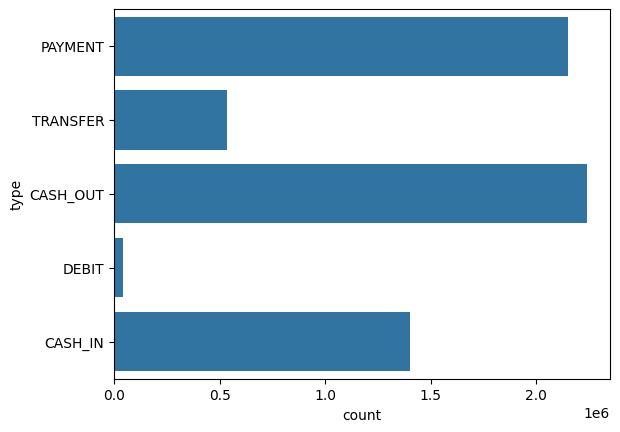

In [15]:
sns.countplot(df_copy['type']);

A short description: 

**PAYMENT**:
- I guess this is a payment to a merchant or for another service

**TRANSFER**:
- Transfer from one account to another

**CASH_OUT**:
- Withdrawal of cash from the account

**CASH_IN**:
- Deposit or addition of cash to the account

**DEBIT**:
- Direct debit from the account (like an automatic withdrawal)

As we can see here, PAYMENT and CASH_OUT are the most frequently used types. 
Second most common is CASH_IN. 

TRANSFER isn't used as often, and DEBIT is the least used payment method. 

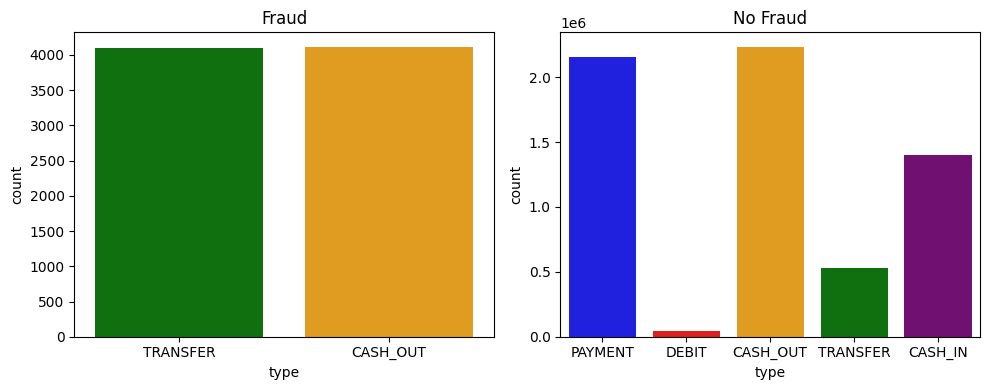

In [16]:
# Let's compare the type and the isFraud Features

custom_palette = {
    'PAYMENT': 'blue',
    'TRANSFER': 'green',
    'CASH_OUT': 'orange',
    'CASH_IN': 'purple',
    'DEBIT': 'red'
}

fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.countplot(x = 'type', data = df_copy[df_copy['isFraud'] == 1], ax = axes[0], hue = 'type', palette=custom_palette)
axes[0].set_title('Fraud')

sns.countplot(x = 'type', data = df_copy[df_copy['isFraud'] == 0], ax = axes[1], hue = 'type', palette=custom_palette)
axes[1].set_title('No Fraud')

plt.tight_layout()
plt.show()

In [17]:
frauds = df_copy[df_copy['isFraud'] == 1].groupby('type').size()
print(frauds)

type
CASH_OUT    4116
TRANSFER    4097
dtype: int64


In [18]:
no_frauds = df_copy[df_copy['isFraud'] == 0].groupby('type').size()
print(no_frauds)

type
CASH_IN     1399284
CASH_OUT    2233384
DEBIT         41432
PAYMENT     2151495
TRANSFER     528812
dtype: int64


We just have Frauds in the TRANSFER and CASH_OUT type. There a NO Frauds in the other type.

In [19]:
# Let's take a look just into the Frauds
# Create a 'new' dataset where 'isFraud' = 1

df_fraud = df_copy[df_copy['isFraud'] == 1] 
df_fraud.head(30)

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.00,C339924917,6268.00,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.00,C667346055,102.00,9291619.62,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.00,C431687661,0.00,0.00,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.00,C716083600,0.00,2444985.19,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.00,C1136419747,0.00,0.00,1,0


In [20]:
df_fraud[['step', 'amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].describe()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest
count,8213.000000,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03
mean,368.413856,1.467967e+06,1.649668e+06,1.923926e+05,5.442496e+05,1.279708e+06
std,216.388690,2.404253e+06,3.547719e+06,1.965666e+06,3.336421e+06,3.908817e+06
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,181.000000,1.270913e+05,1.258224e+05,0.000000e+00,0.000000e+00,0.000000e+00
50%,367.000000,4.414234e+05,4.389835e+05,0.000000e+00,0.000000e+00,4.676420e+03
75%,558.000000,1.517771e+06,1.517771e+06,0.000000e+00,1.478287e+05,1.058725e+06
max,743.000000,1.000000e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08


**Conclusion**


**Sender Account Balances**:
- The median of the oldbalanceOrig is around 438,983 which is close to the median of the amount.
- This suggests that in many cases almost the entire account balance is used for the transaction.
- In the newbalanceOrig the median is 0 and even the 75th percentile is 0, indicating that in more than a half of the fraud cases, the sender's account is completly emptied.

**Recipient Account Balnces**:
- the median of the oldbalanceDesr is 0 which suggests that many recipient accounts had a little to no balance before the transaction.
  But there are also extremly high max values, pointing to outliers.
- the median of the newbalanceDest is about 4,676 which is much lower than the mean (approx. 1.28 million).
  this could imply that in many cases the money is deposited into previously empty or very low-balance recipient accounts, while some cases show significantly higher endling balances.

**Overall Conlusion**:
- many fraud transactions completely deplete the sender's account, as evidenced by the median of newbalanceOrog being 0.
- amounts and account balances vary greatly and exhiit outliers, which suggests different fraud patterns or strategies.
- the fact that many recipient accounts are empty or nearly empty before the transaction might indicate that these accounts are specifically used or newly created for fraud transactions.

In [21]:
sorted_frauds = df_fraud.sort_values(by = ['step', 'amount', 'nameOrig'])
sorted_frauds.head(20)

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
1870,1,CASH_OUT,25071.46,C1275464847,25071.46,0.0,C1364913072,9083.76,34155.22,1,0
1869,1,TRANSFER,25071.46,C669700766,25071.46,0.0,C1384210339,0.00,0.00,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.00,0.00,1,0
1116,1,CASH_OUT,35063.63,C1635772897,35063.63,0.0,C1983025922,31140.00,7550.03,1,0


In [22]:
# And now let us ake a look into the Non-Frauds
# Create a 'new' dataset where 'isFraud' = 0

df_non_fraud = df_copy[df_copy['isFraud'] == 0]
df_non_fraud.head(20)

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0
10,1,DEBIT,9644.94,C1900366749,4465.00,0.00,C997608398,10845.0,157982.12,0,0
11,1,PAYMENT,3099.97,C249177573,20771.00,17671.03,M2096539129,0.0,0.00,0,0


In [23]:
df_non_fraud[['step', 'amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].describe()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06
mean,2.432357e+02,1.781970e+05,8.328287e+05,8.559702e+05,1.101421e+06,1.224926e+06
std,1.421402e+02,5.962370e+05,2.887144e+06,2.924987e+06,3.399202e+06,3.673816e+06
min,1.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.336840e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.468472e+04,1.406900e+04,0.000000e+00,1.333118e+05,2.148817e+05
75%,3.340000e+02,2.083648e+05,1.069695e+05,1.447307e+05,9.441446e+05,1.111975e+06
max,7.180000e+02,9.244552e+07,4.381886e+07,4.368662e+07,3.560159e+08,3.561793e+08


**Conclusion**

**Step**:
- The average step is about 243, with values ranging from 1 to 718. This is lower than the fraud cases,
  suggesting that non-fraud transactions tend to occur earlier or have a different timing pattern.

**Transaction Amounts**:
- mean amount is approx. 178,000 and the median is around 74,700 which are lower than the fraud cases.
- indicates that non-fraud transactions typically involve smaller amounts

**Sender Account Balnces**:
- the median of the oldbalanceOrig for non-fraud is only about 14,069 whereas fraud transactions have a much higher median.
- indicates that fraud tends to originate from accounts with larger balances.

**Recipient Account Balances**:
- the statistics for the oldbalanceDest and newbalanceDest also show that non-fraud transactions generally involve lower balances compared to fraud transactions.

**Overall Conclusion**:
- non fraud transactions appear to be chracterized by earlier time steps, lower transaction amounts and lower sender balances.
- these differences highlight distinct behavioral patterns between fraud and non-fraud cases

### Feature Correlations

In [24]:
# Correlation with Target 'isFraud'

# Prepare data to check the correlations
df_corr = df_copy.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)

# Get dummies for the 'type' feature
df_corr_dummies = pd.get_dummies(df_corr[['step', 'type', 'amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest',
                                         'newbalanceDest', 'isFraud']], dtype = int, drop_first = True)

In [25]:
df_corr_dummies.head()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


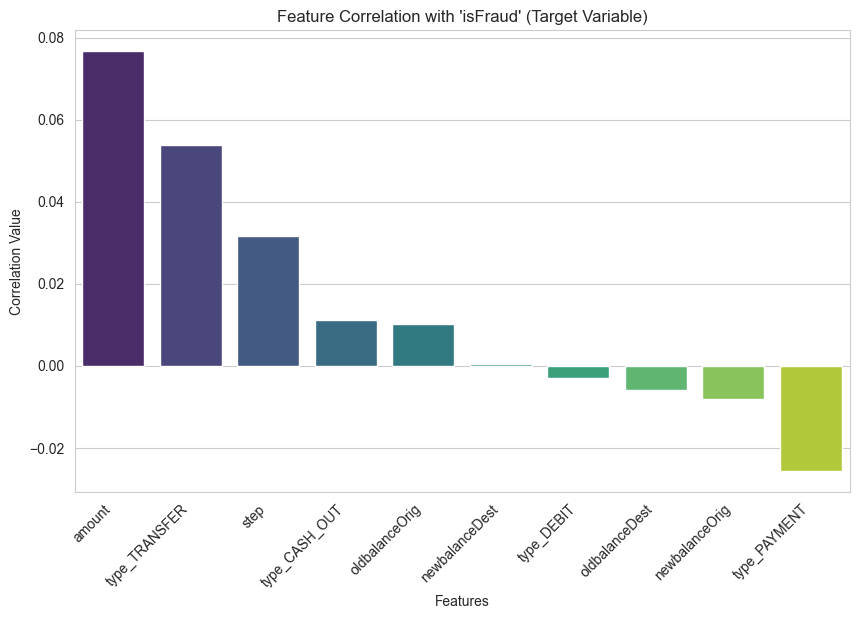

In [26]:
corr = df_corr_dummies.corr()['isFraud'].drop(['isFraud']).sort_values(ascending = False)

sns.set_style('whitegrid')

plt.figure(figsize=(10,6))
sns.barplot(x = corr.index, y = corr.values, palette = 'viridis', hue = corr.index, legend = False)
plt.xticks(rotation = 45, ha = 'right')
plt.title("Feature Correlation with 'isFraud' (Target Variable)")
plt.ylabel('Correlation Value')
plt.xlabel('Features')
plt.show()

**Conclusion**

- Like we saw before, the barplot shows that the **'amount'** has the strongest positive correlation with **'isFraud'**.
- Features like **newbalanceOrig** and **oldbalanceDest** show very low correlation, despite our findings that many fraudulent transactions result in zero balances. That may be due to outliers and non-linear patterns that correlation alone can not capture
- Types like **TRANSFER** and **CASH_OUT** show moderate correlation with fraud since these are te only types where fraud was detected
- The feature **PAYMENT** shows a noticeable negative correlation with **'isFraud'**, which supports the finding that all transactions of this type are non-frauds. This makes it a strong indicator for legitimate behavior in the dataset


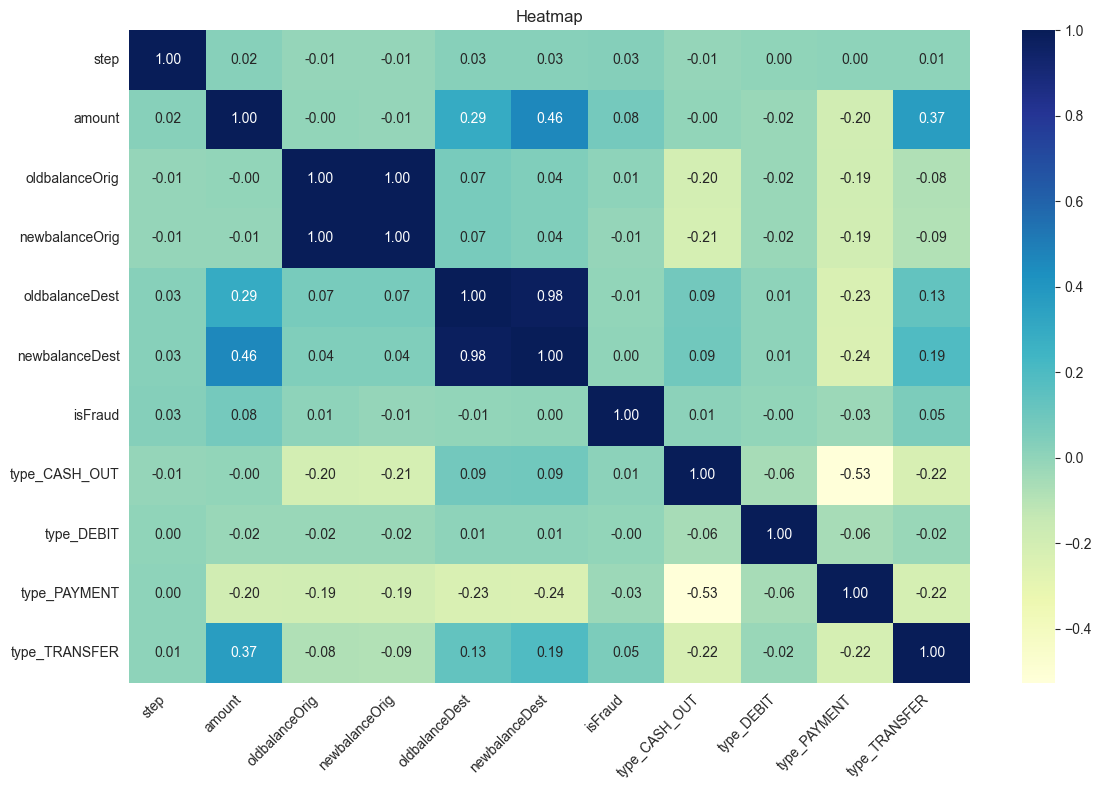

In [27]:
corr_matrix = df_corr_dummies.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cbar = True, fmt = '.2f', cmap = 'YlGnBu', annot = True)
plt.title('Heatmap')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

In [61]:
# Save the non_fraud and fraud data

folder_path = os.getenv("DATA_PATH")

# df_fraud.to_csv(os.path.join(folder_path, "fraud_data.csv"), index = False)
# df_non_fraud.to_csv(os.path.join(folder_path, "non_fraud_data.csv"), index = False)

## Feature Engineering

### Creating new Features

In [29]:
# 1. Balance change for sender and receiver accounts

df_new_features = df_copy.copy()

df_new_features['balanceChangeOrig'] = df_new_features['oldbalanceOrig'] - df_new_features['newbalanceOrig']

In [30]:
df_new_features['balanceChangeDest'] = df_new_features['oldbalanceDest'] - df_new_features['newbalanceDest']

Helps capture how much money is actually moved during a transaction

In [31]:
column_reorder = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrig', 'newbalanceOrig', 'balanceChangeOrig',
                  'nameDest', 'oldbalanceDest', 'newbalanceDest', 'balanceChangeDest', 'isFraud', 'isFlaggedFraud']

df_new_features = df_new_features[column_reorder]

df_new_features.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,balanceChangeOrig,nameDest,oldbalanceDest,newbalanceDest,balanceChangeDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,9839.64,M1979787155,0.0,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,1864.28,M2044282225,0.0,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,181.00,C553264065,0.0,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,181.00,C38997010,21182.0,0.0,21182.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,11668.14,M1230701703,0.0,0.0,0.0,0,0


In [33]:
# 2. Drop the Feature 'isFlaggedFraud'

df_new_features = df_new_features.drop(['isFlaggedFraud'], axis = 1)

In [46]:
# 3. Combined transaction type CASH_OUT and TRANSFER

df_new_features['CashoutOrTransfer'] = (df_new_features['type'] == 'CASH_OUT') | (df_new_features['type'] == 'TRANSFER')

Because every fraud detection where from type CASH_OUT or TRANSFER

In [50]:
# 3. Flags for empty accounts before/after transaction 

df_new_features['OrigEmptyBefore'] = (df_new_features['oldbalanceOrig'] == 0).astype(int)
df_new_features['OrigEmptyAfter'] = (df_new_features['newbalanceOrig'] == 0).astype(int)

df_new_features['DestEmptyBefore'] = (df_new_features['oldbalanceDest'] == 0).astype(int)
df_new_features['DestEmptyAfter'] = (df_new_features['oldbalanceDest'] == 0).astype(int)

Fraud often involves draining accounts or targeting empty ones

In [51]:
df_new_features

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,balanceChangeOrig,nameDest,oldbalanceDest,newbalanceDest,balanceChangeDest,isFraud,CashoutOrTransfer,OrigEmptyBefore,OrigEmptyAfter,DestEmptyBefore,DestEmptyAfter
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,9839.64,M1979787155,0.00,0.00,0.00,0,False,0,0,1,1
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,1864.28,M2044282225,0.00,0.00,0.00,0,False,0,0,1,1
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,181.00,C553264065,0.00,0.00,0.00,1,True,0,1,1,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,181.00,C38997010,21182.00,0.00,21182.00,1,True,0,1,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,11668.14,M1230701703,0.00,0.00,0.00,0,False,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,339682.13,C776919290,0.00,339682.13,-339682.13,1,True,0,1,1,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,6311409.28,C1881841831,0.00,0.00,0.00,1,True,0,1,1,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,6311409.28,C1365125890,68488.84,6379898.11,-6311409.27,1,True,0,1,0,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,850002.52,C2080388513,0.00,0.00,0.00,1,True,0,1,1,1


### Check nameOrig and nameDest 

In [34]:
# nameOrig: Accounts which appear more than once

orig_counts = df_new_features['nameOrig'].value_counts()
orig_repeated = orig_counts[orig_counts > 1]
total_repeated_orig = len(orig_repeated)
fraud_repeated_orig = df_new_features[df_new_features['nameOrig'].isin(orig_repeated.index)]['isFraud'].sum()

# nameDest: Accounts which appear more than once

dest_counts = df_new_features['nameDest'].value_counts()
dest_repeated = dest_counts[dest_counts > 1]
total_repeated_dest = len(dest_repeated)
fraud_repeated_dest = df_new_features[df_new_features['nameDest'].isin(dest_repeated.index)]['isFraud'].sum()

# Summary

summary = pd.DataFrame({
    'Feature': ['nameOrig', 'nameDest'],
    'Total Repeated Accounts': [total_repeated_orig, total_repeated_dest],
    'Fraud Count': [fraud_repeated_orig, fraud_repeated_dest]
})

print(summary)

    Feature  Total Repeated Accounts  Fraud Count
0  nameOrig                     9298           28
1  nameDest                   459658         5540


- I was thinking about dropping the columns **nameOrig** and **nameDest**. But first I wanted to check if some of these accounts occur more than once or even twice and how many frauds are among them. Seems like in the **nameOrig** column are not that many accounts which appear more than once and even the fraud count is very low.
- On the other hand we do have more repeated accounts in the **nameDest** and more fraud counts than in the nameOrig. 

In [ ]:
#dest_fraud_rate = df_new_features.groupby('nameDest')['isFraud'].mean()

In [ ]:
#df_new_features['dest_fraud_prob'] = df['nameDest'].map(dest_fraud_rate)

- **dest_fraud_prob** represents the fraud rate for each recipient account (nameDest)
- It is calculated as the mean of 'isFraud' for all past transactions associated with a specific nameDest.
- A higher value indicates that the destination account has previously received fraudulent transactions and may be more suspicious.
- This Feature helps the model identify accounts that are frequently targeted or used in fraud schemes

In [55]:
df_new_features = df_new_features.drop(['nameOrig'], axis = 1)

- Dropping **nameOrig** because it is a unique identifier for the sender
- Very limited predictive value (most accounts occur only once)

In [58]:
column_order = ['step', 'type', 'amount', 'oldbalanceOrig', 'newbalanceOrig', 'balanceChangeOrig', 'OrigEmptyBefore',
                  'OrigEmptyAfter', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'balanceChangeDest','DestEmptyBefore', 
                  'DestEmptyAfter', 'isFraud']

df_new_features = df_new_features[column_order]

df_new_features.head()

,step,type,amount,oldbalanceOrig,newbalanceOrig,balanceChangeOrig,OrigEmptyBefore,OrigEmptyAfter,nameDest,oldbalanceDest,newbalanceDest,balanceChangeDest,DestEmptyBefore,DestEmptyAfter,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,9839.64,0,0,M1979787155,0.0,0.0,0.0,1,1,0
1,1,PAYMENT,1864.28,21249.0,19384.72,1864.28,0,0,M2044282225,0.0,0.0,0.0,1,1,0
2,1,TRANSFER,181.00,181.0,0.00,181.00,0,1,C553264065,0.0,0.0,0.0,1,1,1
3,1,CASH_OUT,181.00,181.0,0.00,181.00,0,1,C38997010,21182.0,0.0,21182.0,0,0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,11668.14,0,0,M1230701703,0.0,0.0,0.0,1,1,0


In [59]:
df_ready = df_new_features.copy()

In [60]:
df_ready.head(10)

,step,type,amount,oldbalanceOrig,newbalanceOrig,balanceChangeOrig,OrigEmptyBefore,OrigEmptyAfter,nameDest,oldbalanceDest,newbalanceDest,balanceChangeDest,DestEmptyBefore,DestEmptyAfter,isFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,9839.64,0,0,M1979787155,0.0,0.00,0.00,1,1,0
1,1,PAYMENT,1864.28,21249.00,19384.72,1864.28,0,0,M2044282225,0.0,0.00,0.00,1,1,0
2,1,TRANSFER,181.00,181.00,0.00,181.00,0,1,C553264065,0.0,0.00,0.00,1,1,1
3,1,CASH_OUT,181.00,181.00,0.00,181.00,0,1,C38997010,21182.0,0.00,21182.00,0,0,1
4,1,PAYMENT,11668.14,41554.00,29885.86,11668.14,0,0,M1230701703,0.0,0.00,0.00,1,1,0
5,1,PAYMENT,7817.71,53860.00,46042.29,7817.71,0,0,M573487274,0.0,0.00,0.00,1,1,0
6,1,PAYMENT,7107.77,183195.00,176087.23,7107.77,0,0,M408069119,0.0,0.00,0.00,1,1,0
7,1,PAYMENT,7861.64,176087.23,168225.59,7861.64,0,0,M633326333,0.0,0.00,0.00,1,1,0
8,1,PAYMENT,4024.36,2671.00,0.00,2671.00,0,1,M1176932104,0.0,0.00,0.00,1,1,0
9,1,DEBIT,5337.77,41720.00,36382.23,5337.77,0,0,C195600860,41898.0,40348.79,1549.21,0,0,0


In [62]:
df_ready.to_csv(os.path.join(folder_path, "processed_data.csv"), index = False)